<a href="https://colab.research.google.com/github/matthewbegun/MXN500/blob/main/MXN500_2024_LEC_10_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MXN500 Lecture 10 - Even more linear models!


In [ ]:
#@title Imports
if (!require(pacman)) install.packages("pacman")
pacman::p_load(tidyverse, broom, plotrix, patchwork)

In [ ]:
#@title Options
options(repr.plot.width=15, repr.plot.height=5, repr.plot.pointsize=24)

## Slide 5

Consider the taxon richness (the count of different species present in a region or ecological environment) dataset in Ecologyv2.csv. Does species richness differ, on average, across the locations in the data set?


In [ ]:
# With no models or statistical tests, all we can do is speculate.
# Read in `Location` and `Richness` columns from the data:
cols <- c("Location", "Richness")
df <- read_csv("Ecologyv2.csv", col_select = all_of(cols)) # this is where all the trouble starts!
head(df)

Rows: 16 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Location
dbl (1): Richness

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Location,Richness
<chr>,<dbl>
Cedar Creek,11
Cedar Creek,14
Cedar Creek,13
Cedar Creek,15
Cedar Creek,15
Cedar Creek,12


In [ ]:
# Calculate the mean and std.err by location (using plotrix)
group_by(df, Location) %>% # |>
  summarise(Mean = mean(Richness), SE = std.error(Richness))

Location,Mean,SE
<chr>,<dbl>,<dbl>
Cabbage Tree Creek,5.25000,0.6291529
Cedar Creek,13.33333,0.6666667
South Pine River,7.00000,1.0645813


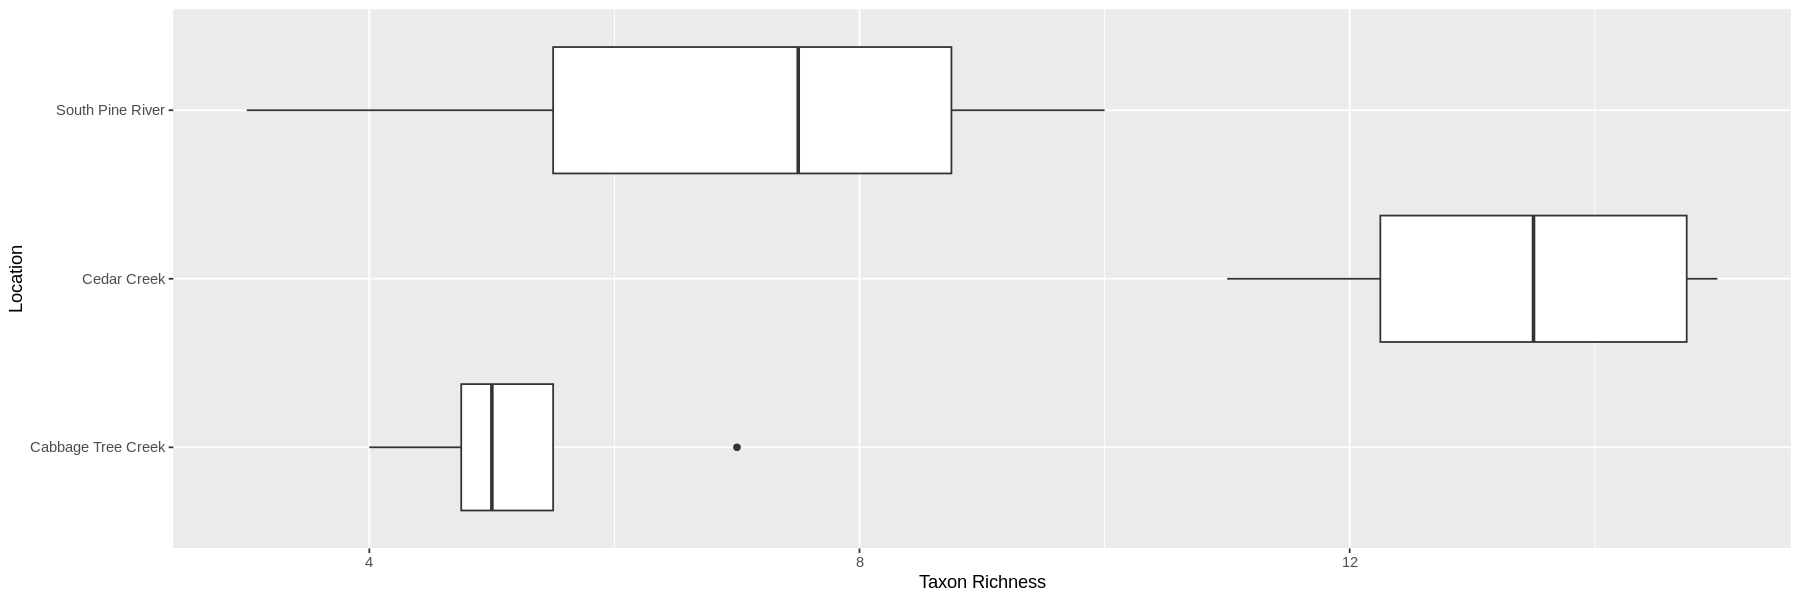

In [ ]:
# The means look different, what about a visual summary of spread:
df <- df %>%
  mutate(Location = factor(Location))

ggplot(df, aes(x=Location, y=Richness)) +
  geom_boxplot() +
  ylab("Taxon Richness") +
  coord_flip()

In [ ]:
# Not quite so clear now.
# These are just summary statistics and visualisations, though.
# We really need a model or test!

## Slide 7

1. Fit a linear regression model to data from Ecologyv2.csv, using location as an explanatory variable and richness as an outcome variable.
1. Find the confidence intervals for the slope estimates of the model.
1. Assess model assumptions for this model.


In [ ]:
?lm

In [ ]:
# Still fit the model as normal.
m <- lm(Richness ~ Location,df)
summary(m)


Call:
lm(formula = Richness ~ Location, data = df)

Residuals:
   Min     1Q Median     3Q    Max 
-4.000 -1.271 -0.125  1.667  3.000 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 5.250      1.001   5.246 0.000158 ***
LocationCedar Creek         8.083      1.292   6.256 2.94e-05 ***
LocationSouth Pine River    1.750      1.292   1.354 0.198664    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.002 on 13 degrees of freedom
Multiple R-squared:  0.7874,	Adjusted R-squared:  0.7546 
F-statistic: 24.07 on 2 and 13 DF,  p-value: 4.263e-05


In [ ]:
# The baseline case is the intercept in our model.
# The parameter estimates show the difference between the baseline and that
# level of location.

# Confidence intervals calculated with df=n-3 (3 parameters in our model):
(B <- tidy(m, conf.int = T))

term,estimate,std.error,statistic,p.value,conf.low,conf.high
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),5.250000,1.000801,5.245798,1.580093e-04,3.087901,7.412099
LocationCedar Creek,8.083333,1.292028,6.256312,2.942026e-05,5.292075,10.874591
LocationSouth Pine River,1.750000,1.292028,1.354459,1.986643e-01,-1.041258,4.541258


In [ ]:
# CIs and p values tell us about richness.
# - Cabbage Tree Creek is significantly different from 0.
# - Cedar Creek is significantly different to Cabbage Tree Creek
# - South Pine River is not significantly different to Cabbage Tree Creek

In [ ]:
# It is difficult to interpret CIs of differences between Cabbage Tree Creek and
# other creeks.
# Let's look at predicting mean values and look at CIs using predict().
newdata <- distinct(df, Location)
loc.ci <- data.frame(predict(object = m,
                            newdata=newdata,
                            interval="confidence"))
loc.ci <- bind_cols(newdata, loc.ci)
loc.ci

,Location,fit,lwr,upr
,<fct>,<dbl>,<dbl>,<dbl>
1,Cedar Creek,13.33333,11.567987,15.098680
2,South Pine River,7.00000,5.234654,8.765346
3,Cabbage Tree Creek,5.25000,3.087901,7.412099


In [ ]:
# Much more interpretable, we have CIs for mean richness now.
# However:
# - adding CIs together is generally invalid.
# - That means the difference in CIs is generally valid.
#   - I.e., we cannot tell whether Cabbage Tree Creek and Cedar Creek are
#     different by looking at whether or not CIs overlap.
# Need to use on our statistical tests and models!

In [ ]:
glance(m)

r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual,nobs
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
0.7873607,0.754647,2.001602,24.0682,4.26268e-05,2,-32.14507,72.29013,75.38049,52.08333,13,16


`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at 5.2096”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 8.1237”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  9.2873e-17”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“There are other near singularities as well. 40.625”
Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
“pseudoinverse used at 5.2096”
Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
“neighborhood radius 8.1237”
Warning mess

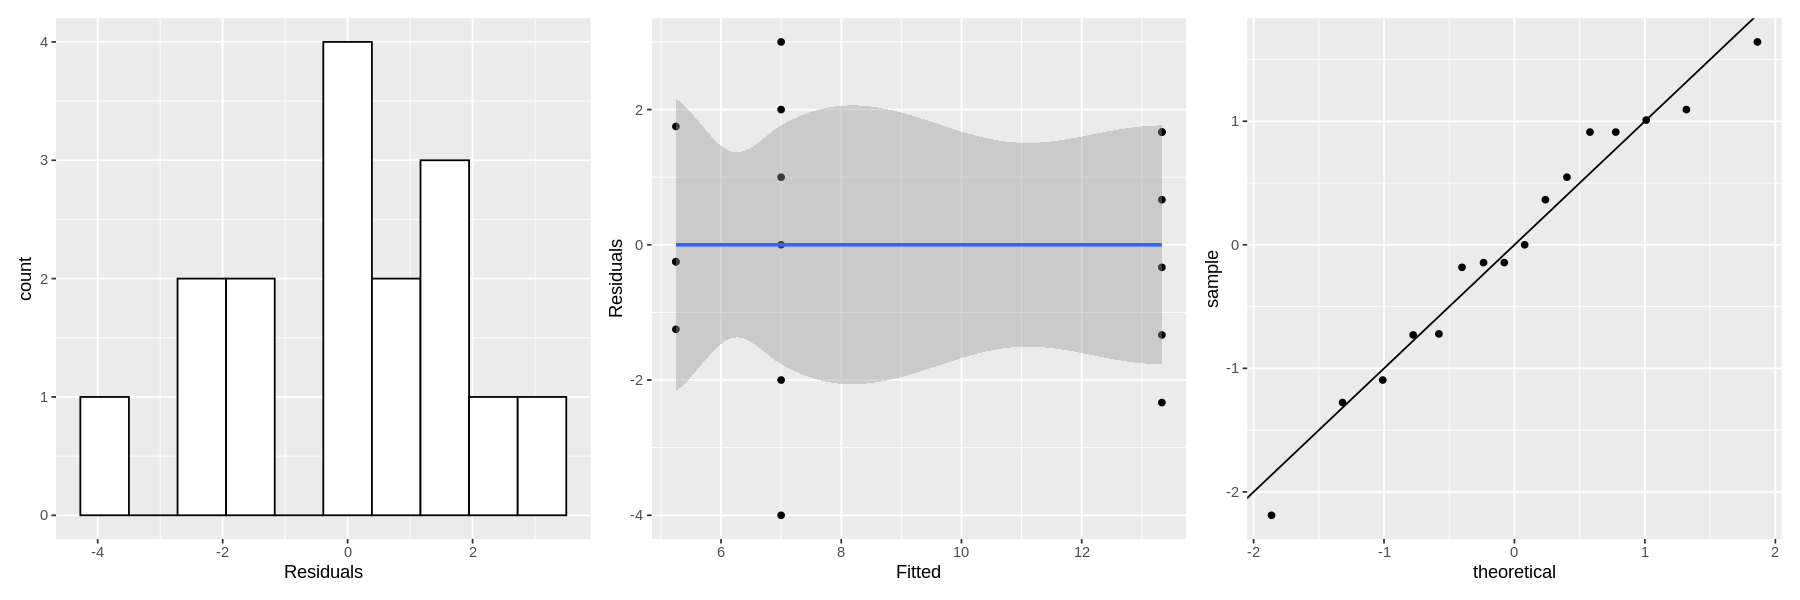

In [ ]:
# Goodness of fit: 0.7874
# Residuals have mean of 0 and standard error of 2.

# Let's check assumptions
res <- fortify(m)

# Create the plots
res.hist <- ggplot(data=res, aes(x=.resid)) +
  geom_histogram(center=0, bins = 10,
                 color="black", fill="white") + xlab("Residuals")

res.fit <- ggplot(data=res, aes(x=.fitted,
                                     y=.resid)) +
  geom_point() + geom_smooth() +
  xlab("Fitted") + ylab("Residuals")

qq <- ggplot(data=res) +
  stat_qq(geom="point", aes(sample=.stdresid)) +
  geom_abline()

# Arrange the plots in one row using patchwork
res.hist + res.fit + qq

In [ ]:
# Histogram is difficult to interpret due to low observations, residuals vs
# fitted shows a similar vertical spread and the qq plot shows approximately
# normal residuals.

## Slide 9

Interpret the regression 𝑝 value for the model.


In [ ]:
summary(m)
glance(m)



Call:
lm(formula = Richness ~ Location, data = df)

Residuals:
   Min     1Q Median     3Q    Max 
-4.000 -1.271 -0.125  1.667  3.000 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 5.250      1.001   5.246 0.000158 ***
LocationCedar Creek         8.083      1.292   6.256 2.94e-05 ***
LocationSouth Pine River    1.750      1.292   1.354 0.198664    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.002 on 13 degrees of freedom
Multiple R-squared:  0.7874,	Adjusted R-squared:  0.7546 
F-statistic: 24.07 on 2 and 13 DF,  p-value: 4.263e-05


r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual,nobs
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
0.7873607,0.754647,2.001602,24.0682,4.26268e-05,2,-32.14507,72.29013,75.38049,52.08333,13,16


In [ ]:
summary(aov(Richness ~ Location, df))

            Df Sum Sq Mean Sq F value   Pr(>F)    
Location     2 192.85   96.43   24.07 4.26e-05 ***
Residuals   13  52.08    4.01                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [ ]:
# For our whole model, we have a p value of 4.26*10^(-5), or 4.26e-5.
# Indicates that we have evidence to reject the hypothesis that the effect of
# location is zero.
# Conclude that location explains variation in richness.

## Slide 10

1. Fit a model which contains no slope term for richness and calculate the F statistic using the equation from week 9.
$$
    F = \frac{\frac{SSE_1 − SSE_2}{\nu_1 - \nu_2}}{\frac{SSE_2}{\nu_2}}
$$

1. Using this statistic, find the 𝑝 value for the ANOVA and determine whether there is a difference in means across locations.


In [ ]:
# Fit a model with contains no slope term:
m0 <- lm(Richness ~ 1, df)
summary(m0)


Call:
lm(formula = Richness ~ 1, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.9375 -3.9375 -0.4375  3.3125  6.0625 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)    8.938      1.010   8.847 2.44e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.041 on 15 degrees of freedom


In [ ]:
# Calculate sum of squared errors:
SSE_1 <- fortify(m0) |>
  summarise(SSE_1 = sum(.resid^2))
SSE_1

SSE_2 <- fortify(m) |>
  summarise(SSE_2 = sum(.resid^2))
SSE_2

SSE_1
<dbl>
244.9375


SSE_2
<dbl>
52.08333


In [ ]:
# Use glance() to find model degrees of freedom:
(nu_1 <- glance(m0)$df.residual)
(nu_2 <- glance(m)$df.residual)

[1] 15

[1] 13

In [ ]:
# Calculate the test statistic:
(ts <- as.numeric(((SSE_1 - SSE_2)/(nu_1 - nu_2))/(SSE_2/nu_2)))

[1] 24.0682

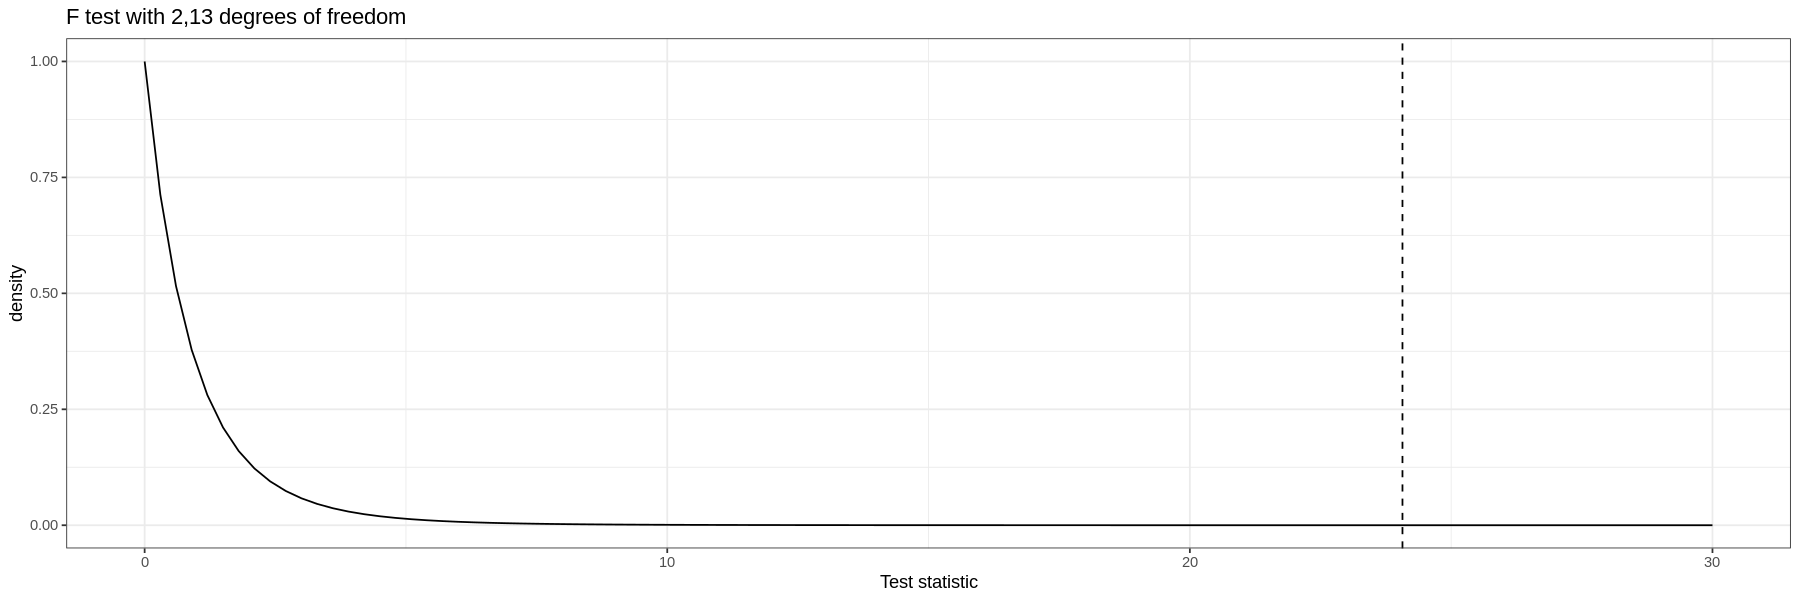

In [ ]:
# Visual:
ggplot(data=data.frame(x=c(0, 30)), aes(x=x)) +
  theme_bw() + xlab("Test statistic") + ylab("density") +
  geom_vline(xintercept=ts, lty=2) +
  ggtitle("F test with 2,13 degrees of freedom") +
  stat_function(fun = stats::df, args=list(df1=nu_1 - nu_2, df2=nu_2), geom="line")

In [ ]:
# note the use of `stats::df` since I'm using `df` for my dataframe
# try this if you see something like :

# Warning message:
# “Computation failed in `stat_function()`
# Caused by error in `fun()`:
# ! could not find function "fun"”

In [ ]:
# p value calculation:
pf(q=ts, df1=nu_1 - nu_2, df2=nu_2, lower.tail=F)

[1] 4.26268e-05

In [ ]:
# There is significant evidence against the null hypothesis (p value = 4.26e-5).
# Therefore, there is a difference in means across locations.

# With only one explanatory variable, this is the same as the full F test:
summary(aov(Richness ~ Location, df))

            Df Sum Sq Mean Sq F value   Pr(>F)    
Location     2 192.85   96.43   24.07 4.26e-05 ***
Residuals   13  52.08    4.01                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

## Slide 12

1. Using the same explanatory variables, fit a model without an intercept by specifying “-1” in our model.
1. Compare the reported 𝑅^2 value to the true value, given by the equation

$$
R^2 = 1 - \frac{\sum^n_1(y_i - \hat{y}_i)^2}{\sum^n_1(y_i - \bar{y}_i)^2}
$$

In [ ]:
# Fit model without intercept.
summary(ms <- lm(Richness ~ Location -1, df))
# summary(ms <- lm(Richness ~ Location -1, df))$r.squared


Call:
lm(formula = Richness ~ Location - 1, data = df)

Residuals:
   Min     1Q Median     3Q    Max 
-4.000 -1.271 -0.125  1.667  3.000 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
LocationCabbage Tree Creek   5.2500     1.0008   5.246 0.000158 ***
LocationCedar Creek         13.3333     0.8172  16.317 4.87e-10 ***
LocationSouth Pine River     7.0000     0.8172   8.566 1.05e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.002 on 13 degrees of freedom
Multiple R-squared:  0.9658,	Adjusted R-squared:  0.9579 
F-statistic: 122.4 on 3 and 13 DF,  p-value: 8.855e-10


In [ ]:
# Calculate true R-squared:
1 - sum(residuals(ms)^2) /
  sum((df$Richness - mean(df$Richness))^2)

[1] 0.7873607

In [ ]:
# Pretty large difference! Keep this in mind when fitting models without
# intercepts!

## Slide 14

Calculate and visualise the CIs and PIs for the full model and present your interpretation of the model, stating confidence intervals for the difference between locations as well as reporting the richness estimate and confidence interval for each location.


In [ ]:
# We already have the confidence intervals from earlier:
loc.ci

,Location,fit,lwr,upr
,<fct>,<dbl>,<dbl>,<dbl>
1,Cedar Creek,13.33333,11.567987,15.098680
2,South Pine River,7.00000,5.234654,8.765346
3,Cabbage Tree Creek,5.25000,3.087901,7.412099


In [ ]:
# Prediction intervals are the same set of functions, but with the "prediction"
# interval argument in predict().
loc.pi <- data.frame(predict(object = m,
                            newdata=newdata,
                            interval="prediction"))
(loc.pi <- bind_cols(newdata, loc.pi))

,Location,fit,lwr,upr
,<fct>,<dbl>,<dbl>,<dbl>
1,Cedar Creek,13.33333,8.6626656,18.00400
2,South Pine River,7.00000,2.3293323,11.67067
3,Cabbage Tree Creek,5.25000,0.4153996,10.08460


In [ ]:
# Remember, we're looking at intervals at each level of our categorical
# variable, so our visual looks a little different from our regression
# intervals.

# First we need to make a combined set of intervals
(
  loc.intervals <- list(Confidence = loc.ci,
                      Prediction = loc.pi) |>
  bind_rows(.id="Interval")
)


,Interval,Location,fit,lwr,upr
,<chr>,<fct>,<dbl>,<dbl>,<dbl>
1,Confidence,Cedar Creek,13.33333,11.5679869,15.098680
2,Confidence,South Pine River,7.00000,5.2346535,8.765346
3,Confidence,Cabbage Tree Creek,5.25000,3.0879010,7.412099
4,Prediction,Cedar Creek,13.33333,8.6626656,18.004001
5,Prediction,South Pine River,7.00000,2.3293323,11.670668
6,Prediction,Cabbage Tree Creek,5.25000,0.4153996,10.084600


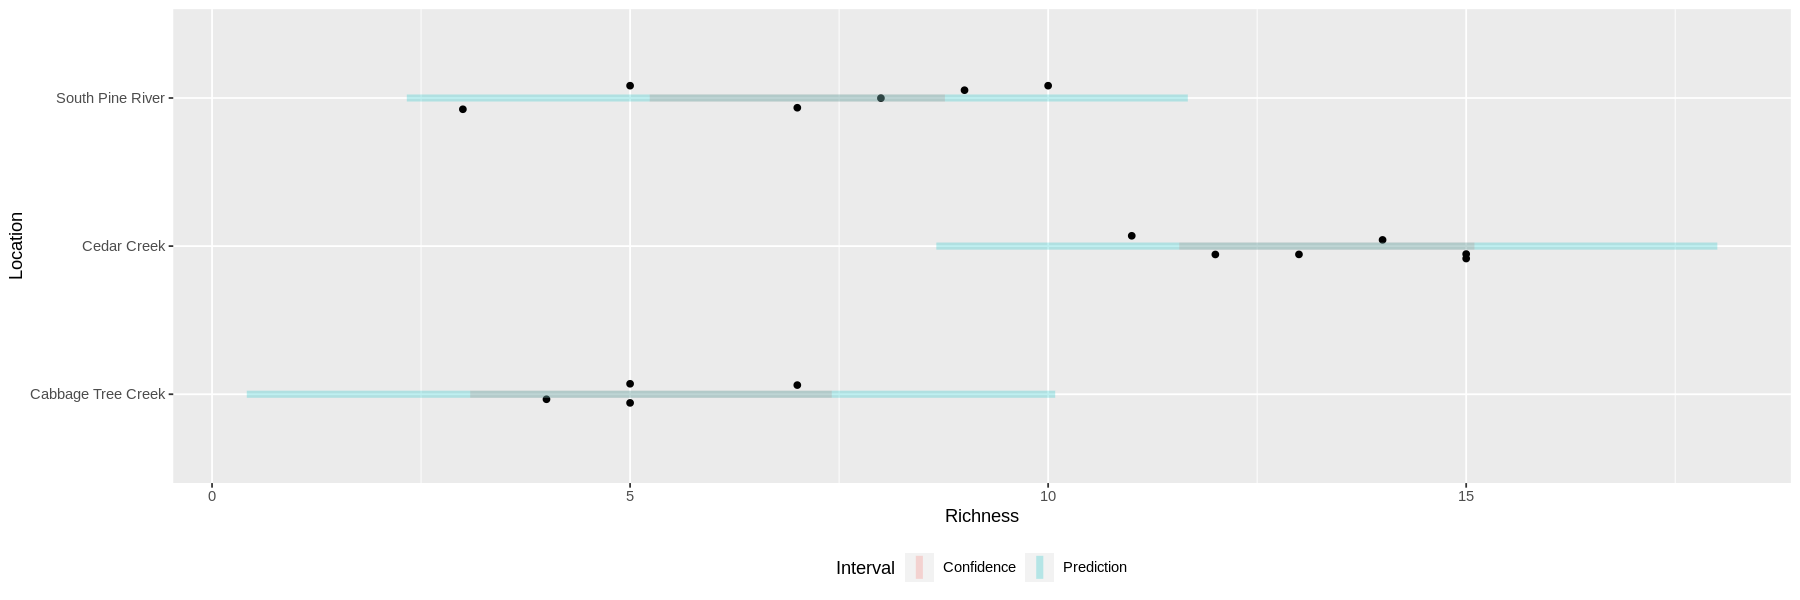

In [ ]:
# now plot
ggplot(data=df, aes(x=Location)) +
  geom_point(position=position_jitter(w=0.1, h=0),
             aes(y= Richness)) +
  coord_flip() +
  geom_linerange(aes(ymin=lwr, ymax=upr, color=Interval), data=loc.intervals,
                 alpha=0.25, linewidth=2) +
  theme(legend.position="bottom")

In [ ]:
# and the model summary to interpret
summary(m)


Call:
lm(formula = Richness ~ Location, data = df)

Residuals:
   Min     1Q Median     3Q    Max 
-4.000 -1.271 -0.125  1.667  3.000 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 5.250      1.001   5.246 0.000158 ***
LocationCedar Creek         8.083      1.292   6.256 2.94e-05 ***
LocationSouth Pine River    1.750      1.292   1.354 0.198664    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.002 on 13 degrees of freedom
Multiple R-squared:  0.7874,	Adjusted R-squared:  0.7546 
F-statistic: 24.07 on 2 and 13 DF,  p-value: 4.263e-05


In [ ]:
# Interpretation:
# Fitted a model of species richness regressed on location.

# Baseline richness at Cabbage Tree Creek was 5.25 with 95% CI of (3.09, 7.41)

# Richness at South Pine River was not different to Cabbage Tree Creek, as 95%
# CI for difference was (-1.041, 4.541)
# - Richness at South Pine River was estimated as 7 with 95% CI of (5.23, 8.77)

# Richness at Cedar Creek was different to Cabbage Tree Creek, as 95% CI for
# difference was (5.292, 10.875)
# - Richness at Cedar Creek was estimated as 13.33 with 95% CI of (11.57, 15.1)

# R-squared indicated 78.74% of the variability in richness explained by
# location.



## Slide 16

1. Use `fct_relevel()` to modify the model, setting Cedar Creek as the baseline location. What effect does that have on our model fit?


In [ ]:
# Currently, our creeks are ordered alphabetically:
df$Location

[1] Cedar Creek        Cedar Creek        Cedar Creek        Cedar Creek       
 [5] Cedar Creek        Cedar Creek        South Pine River   South Pine River  
 [9] South Pine River   South Pine River   South Pine River   South Pine River  
[13] Cabbage Tree Creek Cabbage Tree Creek Cabbage Tree Creek Cabbage Tree Creek
Levels: Cabbage Tree Creek Cedar Creek South Pine River

In [ ]:
# Setting Cedar Creek as baseline:
df <- mutate(df, Location = fct_relevel(Location, "Cedar Creek"))
df$Location


[1] Cedar Creek        Cedar Creek        Cedar Creek        Cedar Creek       
 [5] Cedar Creek        Cedar Creek        South Pine River   South Pine River  
 [9] South Pine River   South Pine River   South Pine River   South Pine River  
[13] Cabbage Tree Creek Cabbage Tree Creek Cabbage Tree Creek Cabbage Tree Creek
Levels: Cedar Creek Cabbage Tree Creek South Pine River

In [ ]:
# Resulting model:
tidy(lm(Richness ~ Location, df))
tidy(m)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),13.333333,0.8171506,16.316862,4.867995e-10
LocationCabbage Tree Creek,-8.083333,1.2920285,-6.256312,2.942026e-05
LocationSouth Pine River,-6.333333,1.1556254,-5.480438,1.056012e-04


term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),5.250000,1.000801,5.245798,1.580093e-04
LocationCedar Creek,8.083333,1.292028,6.256312,2.942026e-05
LocationSouth Pine River,1.750000,1.292028,1.354459,1.986643e-01


In [ ]:
# Now our interpretation has changed slightly: both Cabbage Tree Creek and South
# Pine River are both different from the baseline!

# Choice of baseline matters, both to the numbers and to the interpretation.

## Slide 19

Fit the described model using the mtcars data set and provide a brief summary of the model.


In [ ]:
# how does it look at the start?
data(mtcars)
head(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


In [ ]:
# convert cyl and am to factor:
mtcars <- mutate(mtcars, across(c(cyl, am), factor))

# human friendly:
mtcars <- mutate(mtcars,
                 trans = fct_recode(am,
                                    auto = "0",
                                    manual = "1"))

# Baseline is now a 4 cylinder auto
count(mtcars, trans, cyl)

trans,cyl,n
<fct>,<fct>,<int>
auto,4,3
auto,6,4
auto,8,12
manual,4,8
manual,6,3
manual,8,2


In [ ]:
# The model:
lm_cars <- lm(mpg ~ trans + cyl, mtcars)
glance(lm_cars)
glance(lm_cars)$r.squared

# for reference, there are *too many* ways in R to get data from an object
# select(glance(m), r.squared)
# glance(m) |> select(r.squared)
# glance(m) |> pull(r.squared)

r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual,nobs
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
0.7651114,0.7399447,3.073479,30.40181,5.959269e-09,3,-79.19946,168.3989,175.7276,264.4957,28,32


[1] 0.7651114

In [ ]:
tidy(lm_cars, conf.int = T) |>
  select(term, estimate, conf.low, conf.high, p.value)

term,estimate,conf.low,conf.high,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),24.801852,22.09259815,27.511106,2.182425e-17
transmanual,2.559954,-0.09801611,5.217924,5.845717e-02
cyl6,-6.156118,-9.30190345,-3.010332,4.106131e-04
cyl8,-10.067560,-13.04201552,-7.093104,1.546574e-07


In [ ]:
# Interpretation:
# - 76.5% of variability explained by the model.
# - No difference when we switch from auto to manual transmission.
# - 6 and 8 cylinder cars have lower fuel efficiency than 4 cylinder.


## Slide 21

1. Fit the interaction in the described model, using by using `*` in the `lm()` function.
1. Comparing this model to the previous model, is the amount of variation explained in the expanded model greater than the simpler model?
1. Does transmission improve model fit?


In [ ]:
# Model with interactions:
lm_cars_int <- lm(mpg ~ trans * cyl, mtcars)
glance(lm_cars_int)$r.squared
glance(lm_cars_int)


[1] 0.7877006

r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual,nobs
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
0.7877006,0.7468738,3.032257,19.29371,5.179255e-08,5,-77.58164,169.1633,179.4234,239.0592,26,32


In [ ]:
# Slightly higher R-squared than the model without interaction.
tidy(lm_cars_int, conf.int = T)


term,estimate,std.error,statistic,p.value,conf.low,conf.high
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),22.900000,1.750674,13.080673,6.057324e-13,19.3014371,26.4985629
transmanual,5.175000,2.052848,2.520888,1.817605e-02,0.9553109,9.3946891
cyl6,-3.775000,2.315925,-1.630018,1.151546e-01,-8.5354513,0.9854513
cyl8,-7.850000,1.957314,-4.010599,4.547583e-04,-11.8733157,-3.8266843
transmanual:cyl6,-3.733333,3.094784,-1.206331,2.385526e-01,-10.0947539,2.6280873
transmanual:cyl8,-4.825000,3.094784,-1.559075,1.310693e-01,-11.1864206,1.5364206


In [ ]:
# Comparison to previous model:
anova(lm_cars, lm_cars_int)


,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,28,264.4957,NA,NA,NA,NA
2,26,239.0592,2,25.43651,1.383233,0.268614


In [ ]:
tidy(lm_cars, conf.int = T)


term,estimate,std.error,statistic,p.value,conf.low,conf.high
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),24.801852,1.322615,18.752135,2.182425e-17,22.09259815,27.511106
transmanual,2.559954,1.297579,1.972869,5.845717e-02,-0.09801611,5.217924
cyl6,-6.156118,1.535723,-4.008612,4.106131e-04,-9.30190345,-3.010332
cyl8,-10.067560,1.452082,-6.933187,1.546574e-07,-13.04201552,-7.093104


In [ ]:
# Conclude that there's no statistically significant difference between these
# models.

# Compare our "best" model to a model without transmission:
lm_cyl <- lm(mpg ~ cyl, mtcars)
glance(lm_cyl)
anova(lm_cyl, lm_cars)


r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual,nobs
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
0.7324601,0.714009,3.223099,39.69752,4.978919e-09,2,-81.28198,170.564,176.4269,301.2626,29,32


,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,29,301.2626,NA,NA,NA,NA
2,28,264.4957,1,36.76692,3.892214,0.05845717


In [ ]:
# Conclude again that there's no statistically significant difference between
# these models, i.e., can omit transmission from model.
